Alisador de Friedrics

<>:46: SyntaxWarning: invalid escape sequence '\e'
<>:46: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Grego\AppData\Local\Temp\ipykernel_41100\1774792986.py:46: SyntaxWarning: invalid escape sequence '\e'
  plt.title("$\eta(x)$")


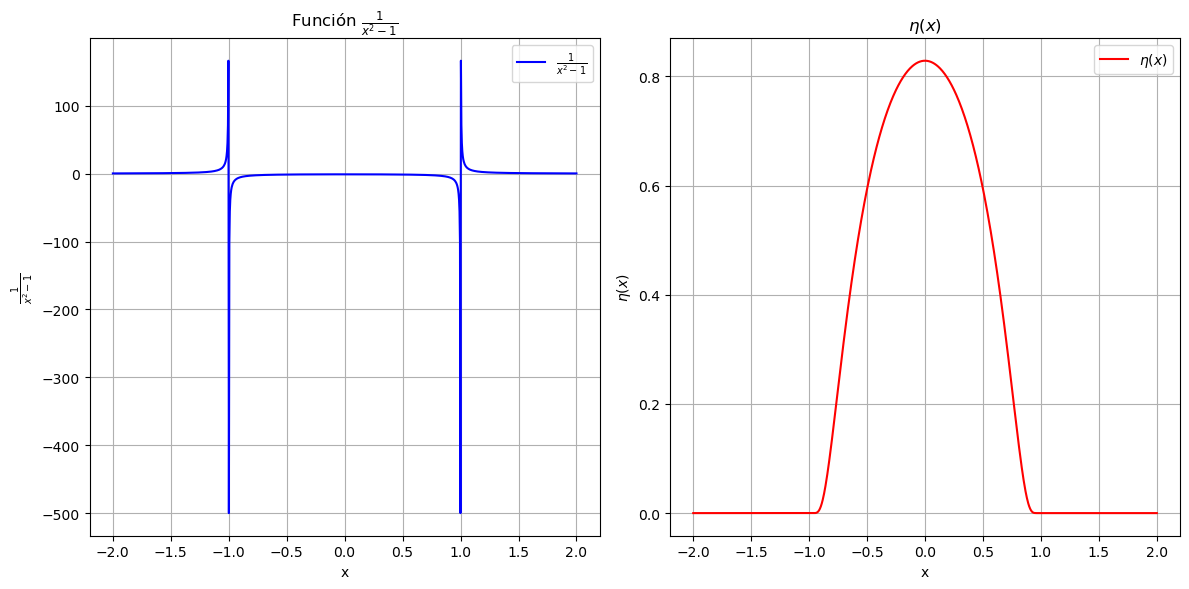

La constante de normalización es aproximadamente: 2.252283621043585
La integral de η(x) sobre la recta real es aproximadamente: 1.0000000000000018


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def integrand(x):
    return np.exp(1 / (x**2 - 1))

# Calcular la integral de la función integrand entre -1 y 1
integral, _ = quad(integrand, -1, 1)
C = 1 / integral  # Constante de normalización

def eta(x):
    x = np.asarray(x)
    result = np.zeros_like(x)
    mask = np.abs(x) < 1
    x_masked = x[mask]
    # Calcular el exponente solo para los elementos dentro del intervalo (-1, 1)
    exponent = 1 / (x_masked**2 - 1)
    result[mask] = C * np.exp(exponent)
    return result

# Crear datos para graficar la función original
x_values_original = np.linspace(-2, 2, 1000)
x_values_original = x_values_original[(np.abs(x_values_original) != 1)]
y_values_original = 1 / (x_values_original**2 - 1)

# Crear datos para graficar el suavizador eta(x)
x_values_mollifier = np.linspace(-2, 2, 1000)
y_values_mollifier = eta(x_values_mollifier)

# Configurar las gráficas
plt.figure(figsize=(12, 6))

# Gráfica de la función original
plt.subplot(1, 2, 1)
plt.plot(x_values_original, y_values_original, label=r'$\frac{1}{x^2 - 1}$', color='blue')
plt.title(r"Función $\frac{1}{x^2 - 1}$")
plt.xlabel("x")
plt.ylabel(r'$\frac{1}{x^2 - 1}$')
plt.legend()
plt.grid(True)

# Gráfica del suavizador eta(x)
plt.subplot(1, 2, 2)
plt.plot(x_values_mollifier, y_values_mollifier, label=r'$\eta(x)$', color='red')
plt.title("$\eta(x)$")
plt.xlabel("x")
plt.ylabel(r'$\eta(x)$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"La constante de normalización es aproximadamente: {C}")

# Verificar la integral de eta(x) sobre toda la recta real
integral_eta, _ = quad(eta, -np.inf, np.inf)
print(f"La integral de η(x) sobre la recta real es aproximadamente: {integral_eta}")

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

def weierstrass(x, a=0.5, b=3, n_terms=100):
    return np.sum([a**n * np.cos(b**n * np.pi * x) for n in range(n_terms)], axis=0)

def eta_e(x, eps):
    return (1 / eps) * np.exp(-x**2 / (2 * eps**2)) / np.sqrt(2 * np.pi)

x = np.linspace(-2, 2, 2000)  # Aumentamos la resolución con más puntos
y_weierstrass = weierstrass(x)

eps_values = np.linspace(0.5, 0.0001, 100)  # Más valores de epsilon más pequeños y en mayor cantidad
filenames = []

for i, eps in enumerate(eps_values):
    eta_values = eta_e(x, eps)
    y_alisado = np.convolve(y_weierstrass, eta_values, mode='same') / np.sum(eta_values)
    
    filename = f"alisamiento_{i:03d}.png"
    plt.figure(figsize=(10, 5), dpi=200)  # Aumentamos la calidad del gráfico
    plt.plot(x, y_weierstrass, label="Weierstrass", alpha=0.7, color='orange')
    plt.plot(x, y_alisado, label=f"Alisado ($\epsilon={eps:.5f}$)", linewidth=2, color='red')
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Alisamiento con el alisador de Friedrichs")
    plt.grid()
    plt.savefig(filename, dpi=200)  # Guardamos imágenes en alta resolución
    plt.close()
    filenames.append(filename)

gif_path = "alisamiento_highres.gif"
imageio.mimsave(gif_path, [imageio.v2.imread(f) for f in filenames], duration=0.15, loop=0)  # Mayor fluidez

for f in filenames:
    os.remove(f)

print(f"GIF generado: {gif_path}")


<>:25: SyntaxWarning: invalid escape sequence '\e'
<>:25: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Grego\AppData\Local\Temp\ipykernel_41100\952937268.py:25: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(x, y_alisado, label=f"Alisado ($\epsilon={eps:.5f}$)", linewidth=2, color='red')


GIF generado: alisamiento_highres.gif


Poisson en placa rectangular con CF constante en ell borde superior 

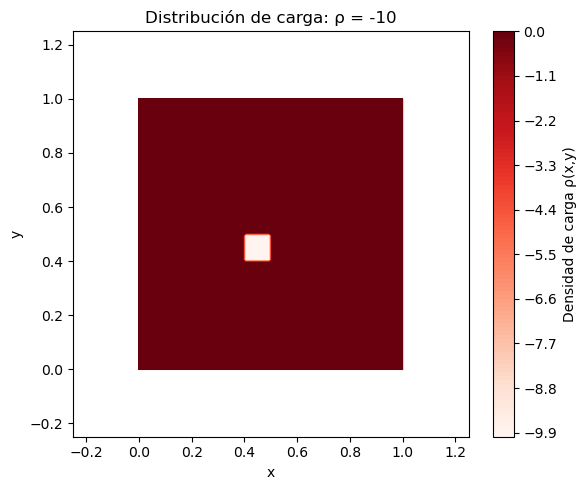

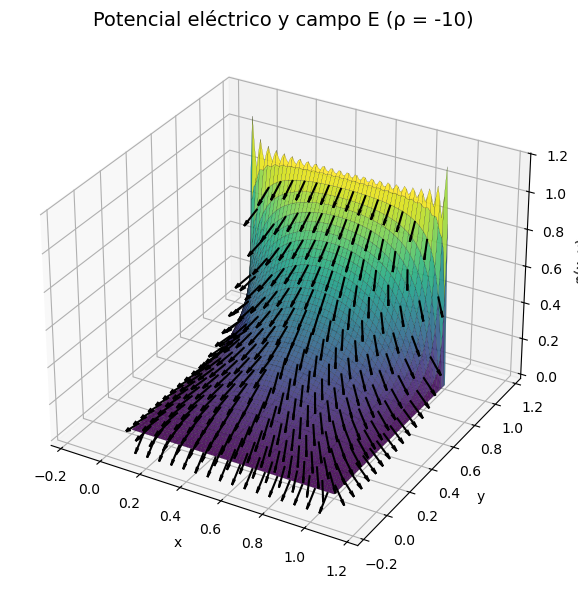

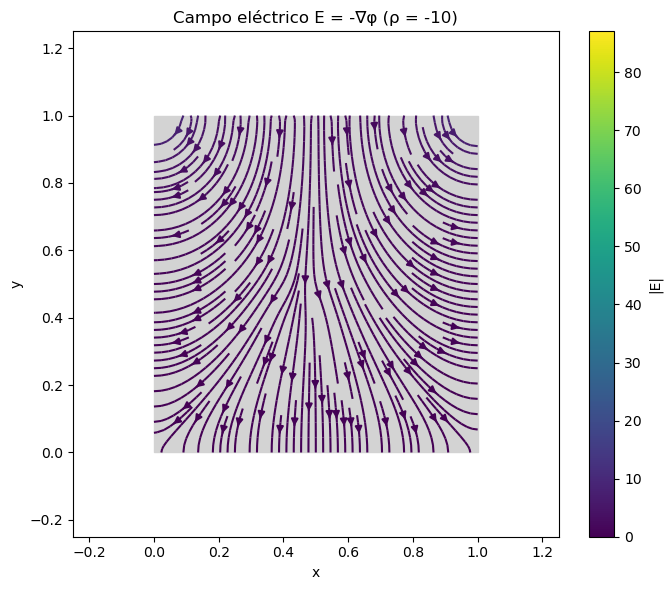

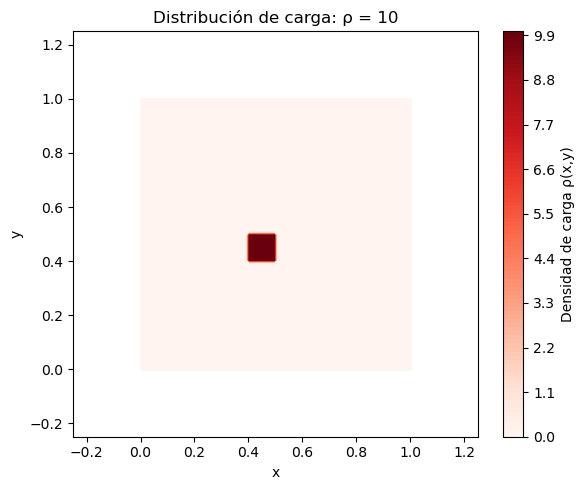

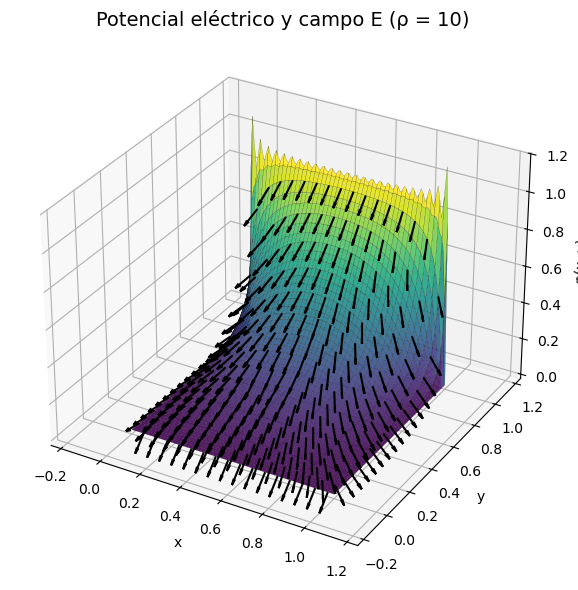

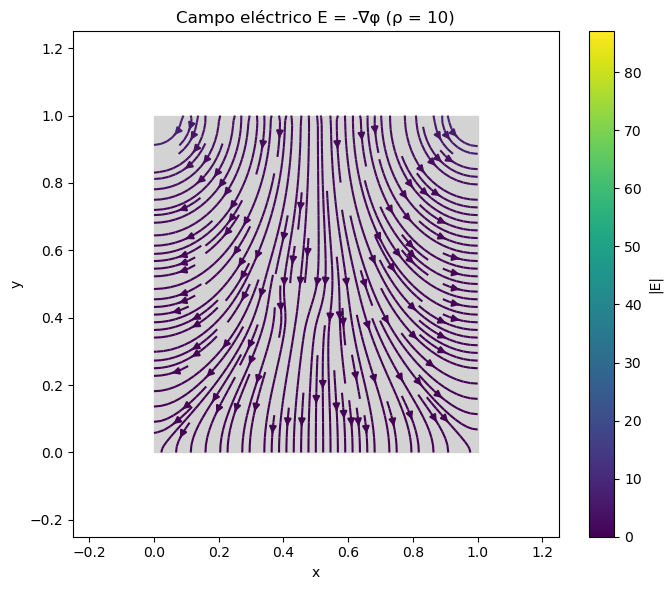

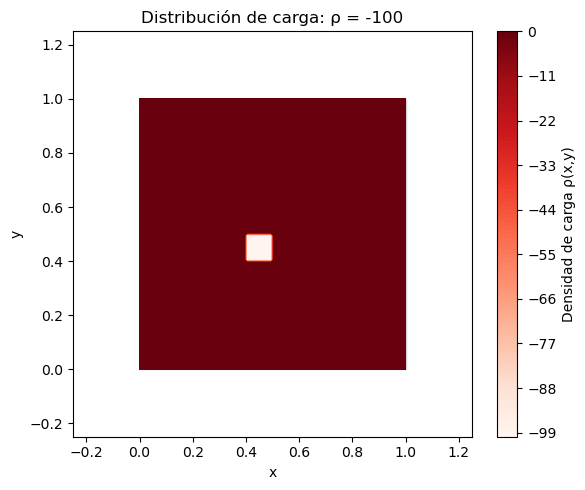

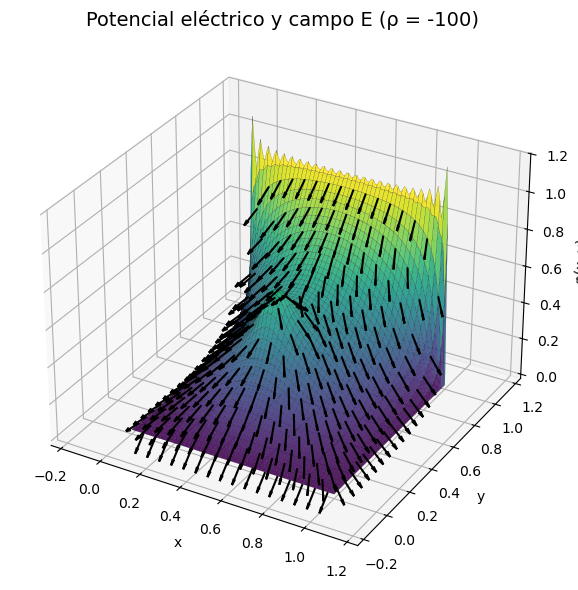

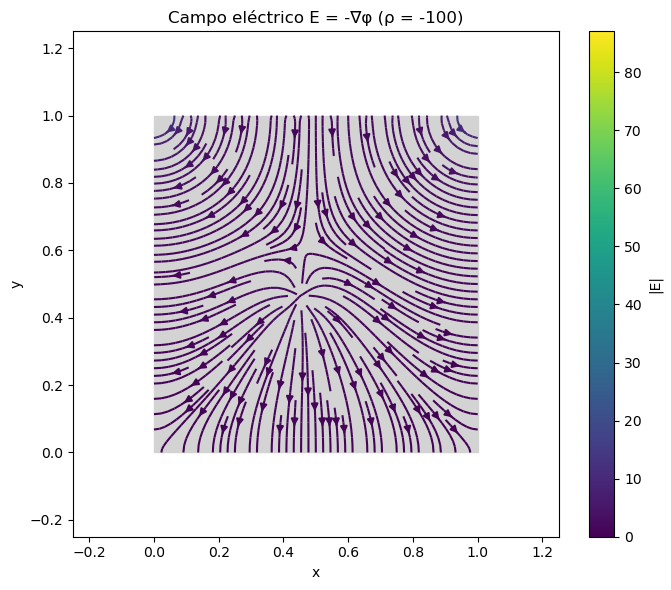

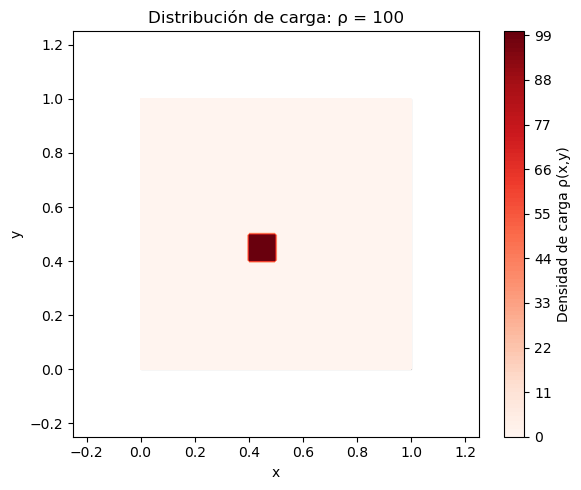

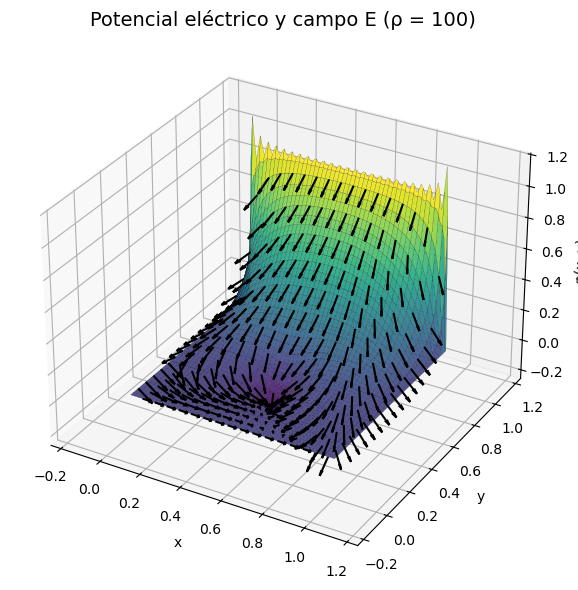

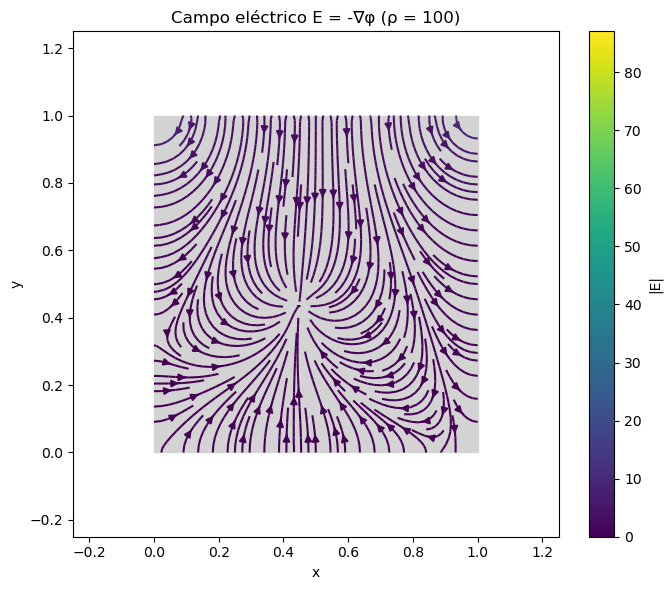

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, patches

a = 1.0
b = 1.0
Nx = 100
Ny = 100
x = np.linspace(0, a, Nx)
y = np.linspace(0, b, Ny)
X, Y = np.meshgrid(x, y)

V0 = 1.0
N_terms = 50
cargas = [-10, 10, -100, 100]

for valor in cargas:
    rho = np.zeros_like(X)
    rho[(Y > 0.4) & (Y < 0.5) & (X > 0.4) & (X < 0.5)] = valor

    fig, ax = plt.subplots(figsize=(6, 5))
    ax.set_xlim(-0.25, 1.25)
    ax.set_ylim(-0.25, 1.25)
    ax.add_patch(patches.Rectangle((0, 0), 1, 1, color='lightgrey', zorder=0))
    contour = ax.contourf(X, Y, rho, levels=100, cmap='Reds', zorder=1)
    plt.colorbar(contour, label='Densidad de carga ρ(x,y)')
    ax.set_title(f'Distribución de carga: ρ = {valor}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.tight_layout()
    plt.show()

    phi_laplace = np.zeros_like(X)
    for n in range(1, N_terms + 1, 2):
        term = (4 * V0) / (n * np.pi) * np.sinh(n * np.pi * Y / a) * np.sin(n * np.pi * X / a) / np.sinh(n * np.pi * b / a)
        phi_laplace += term

    phi_poisson = np.zeros_like(X)
    for m in range(1, N_terms + 1):
        for n in range(1, N_terms + 1):
            lambda_mn = (m * np.pi / a)**2 + (n * np.pi / b)**2
            integrando = rho * np.sin(m * np.pi * X / a) * np.sin(n * np.pi * Y / b)
            F_mn = (4 / (a * b)) * np.sum(integrando) * (a / Nx) * (b / Ny)
            term = (-F_mn / lambda_mn) * np.sin(m * np.pi * X / a) * np.sin(n * np.pi * Y / b)
            phi_poisson += term

    phi_total = phi_laplace + phi_poisson
    Ey, Ex = np.gradient(-phi_total, y, x)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, phi_total, cmap=cm.viridis, edgecolor='k', linewidth=0.1, alpha=0.9)
    skip = (slice(None, None, 6), slice(None, None, 6))
    Ex_s = Ex[skip]
    Ey_s = Ey[skip]
    Ez_s = -np.sqrt(Ex_s**2 + Ey_s**2)
    norm = np.sqrt(Ex_s**2 + Ey_s**2 + Ez_s**2)
    Ex_n = np.divide(Ex_s, norm, out=np.zeros_like(Ex_s), where=norm!=0)
    Ey_n = np.divide(Ey_s, norm, out=np.zeros_like(Ey_s), where=norm!=0)
    Ez_n = np.divide(Ez_s, norm, out=np.zeros_like(Ez_s), where=norm!=0)
    ax.quiver(X[skip], Y[skip], phi_total[skip], Ex_n, Ey_n, Ez_n, length=0.1, color='black', normalize=False)
    ax.set_xlim(-0.25, 1.25)
    ax.set_ylim(-0.25, 1.25)
    ax.set_title(f"Potencial eléctrico y campo E (ρ = {valor})", fontsize=14)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("φ(x, y)")
    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    ax.set_xlim(-0.25, 1.25)
    ax.set_ylim(-0.25, 1.25)
    ax.add_patch(patches.Rectangle((0, 0), 1, 1, color='lightgrey', zorder=0))
    magnitude = np.sqrt(Ex**2 + Ey**2)
    strm = ax.streamplot(X, Y, Ex, Ey, color=magnitude, cmap='viridis', density=1.5, zorder=1)
    ax.set_title(f"Campo eléctrico E = -∇φ (ρ = {valor})")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.colorbar(strm.lines, label='|E|')
    plt.tight_layout()
    plt.show()
